<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Выводы-по-подготовке-данных:" data-toc-modified-id="Выводы-по-подготовке-данных:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Выводы по подготовке данных:</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Рассмотрим-изменение-концентраций-металлов" data-toc-modified-id="Рассмотрим-изменение-концентраций-металлов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Рассмотрим изменение концентраций металлов</a></span></li><li><span><a href="#Рассмотрим-суммарную-концентрацию-металлов" data-toc-modified-id="Рассмотрим-суммарную-концентрацию-металлов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Рассмотрим суммарную концентрацию металлов</a></span></li><li><span><a href="#Выводы-по-анализу-суммарных-концентраций:" data-toc-modified-id="Выводы-по-анализу-суммарных-концентраций:-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Выводы по анализу суммарных концентраций:</a></span></li><li><span><a href="#Выводы-по-части-анализа-данных:" data-toc-modified-id="Выводы-по-части-анализа-данных:-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Выводы по части анализа данных:</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Проверим-модели-линейной-регресси-на-кросс-валидации-для-каждого-целевого-признака:" data-toc-modified-id="Проверим-модели-линейной-регресси-на-кросс-валидации-для-каждого-целевого-признака:-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Проверим модели линейной регресси на кросс-валидации для каждого целевого признака:</a></span></li><li><span><a href="#Проверим-модели-случайного-леса-на-кросс-валидации-для-каждого-целевого-признака:" data-toc-modified-id="Проверим-модели-случайного-леса-на-кросс-валидации-для-каждого-целевого-признака:-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Проверим модели случайного леса на кросс-валидации для каждого целевого признака:</a></span></li><li><span><a href="#Посчитаем-общее-симметричное-среднее-абсолютное-процентное-отклонение-для-модели-случайного-леса" data-toc-modified-id="Посчитаем-общее-симметричное-среднее-абсолютное-процентное-отклонение-для-модели-случайного-леса-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>Посчитаем общее симметричное среднее абсолютное процентное отклонение для модели случайного леса</a></span></li><li><span><a href="#промежуточный-вывод:" data-toc-modified-id="промежуточный-вывод:-3.0.4"><span class="toc-item-num">3.0.4&nbsp;&nbsp;</span>промежуточный вывод:</a></span></li></ul></li><li><span><a href="#Проверим-модель-на-тестовой-выборке" data-toc-modified-id="Проверим-модель-на-тестовой-выборке-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Проверим модель на тестовой выборке</a></span><ul class="toc-item"><li><span><a href="#Выыод-по-сравнению-с-дамми-моделью:" data-toc-modified-id="Выыод-по-сравнению-с-дамми-моделью:-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Выыод по сравнению с дамми моделью:</a></span></li></ul></li></ul></li></ul></div>

# Восстановление золота из руды

Наша задача - подготовить прототип модели машинного обучения для компании, которая разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды.В нашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.


## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error,  make_scorer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.dummy import DummyRegressor

In [2]:
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
df_full

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19434,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
19435,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
19436,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
19437,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [3]:
df_full.isna().sum()

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

Так как данные взятые близко друг к другу по времени близки (по условию задачи), заполним пропуски значениями из сосоедней строки:


In [4]:
df_full = df_full.ffill(axis=0)
df_full.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

In [5]:
df_full.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

In [6]:
# посмотри на типы данных
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19439 non-null  float64
 2   final.output.concentrate_pb                         19439 non-null  float64
 3   final.output.concentrate_sol                        19439 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19439 non-null  float64
 7   final.output.tail_pb                                19439 non-null  float64
 8   final.output.tail_sol                               19439 non-null  float64


In [7]:
# Рассмотрим обучающие данные
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_train

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14144,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
14145,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
14146,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
14147,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [8]:
df_train = df_train.ffill(axis=0)
df_train.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14149 non-null  float64
 2   final.output.concentrate_pb                         14149 non-null  float64
 3   final.output.concentrate_sol                        14149 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14149 non-null  float64
 8   final.output.tail_sol                               14149 non-null  float64


In [10]:
# Рассмотрим тестовые данные
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_test

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5286,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5287,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5288,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [11]:
df_test = df_test.ffill(axis=0)
df_test


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5286,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5287,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5288,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [12]:
# Мы видим, что в тестовой выборке меньше колонок (признаков), посмотрим, каких не хватает
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5290 non-null   float64
 2   primary_cleaner.input.depressant            5290 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

В тестовом датасете нет данных финальных измерений по каждому металлу. 
Тестовый датасет предоставляет данные только в начале техпроцесса. На этом основании мы будем именно предсказывать, а не рассчитывать необходимые параметры.

In [13]:
# сравним степень восстановления золота по формуле и по нашим данным
F = df_full['rougher.input.feed_au']
C = df_full['rougher.output.concentrate_au']
T = df_full['rougher.output.tail_au']

In [14]:
estimated_recovery = C * (F-T) / (F * (C-T)) *100

In [15]:
df_full['rougher.output.recovery'].median()

86.18889176007977

In [16]:


MSE = mean_absolute_error(estimated_recovery, df_full['rougher.output.recovery'])
MSE

9.874045668302637e-15

Мы видим, что в данных очень точно подсчитана степень восстановления чернового концентрата.

### Выводы по подготовке данных:

1. Мы подгрузили данные в проект, заполнили пропуски и разобрались с тем, как сформированы обучающий и тестовый сеты. 
2. Проверили правильность расчеты целевой метрики и убедились в "исправности" данных.
3. С этим набором уже можно работать и строить модели.

## Анализ данных

###  Рассмотрим изменение концентраций металлов

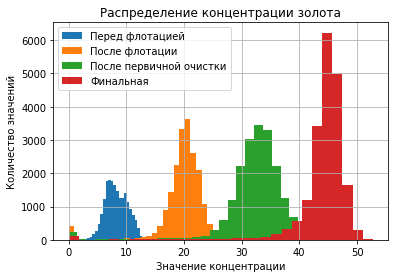

In [17]:
# Рассмотрим концентрацию металлов на разных этапах отчистки. Начнем с золота
df_full['rougher.input.feed_au'].hist(bins=30)
df_full['rougher.output.concentrate_au'].hist(bins=30)
df_full['primary_cleaner.output.concentrate_au'].hist(bins=30)
df_full['final.output.concentrate_au'].hist(bins=30)


plt.legend(['Перед флотацией', 'После флотации', 'После первичной очистки', 'Финальная'])
plt.title('Распределение концентрации золота')
plt.xlabel('Значение концентрации')
plt.ylabel('Количество значений')
plt.show()

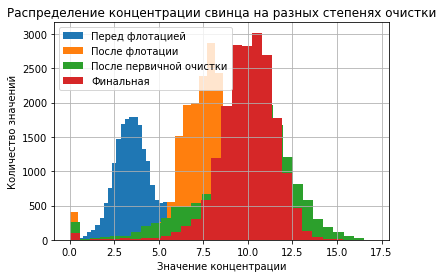

In [18]:
# Свинец
df_full['rougher.input.feed_pb'].hist(bins=30)
df_full['rougher.output.concentrate_pb'].hist(bins=30)
df_full['primary_cleaner.output.concentrate_pb'].hist(bins=30)
df_full['final.output.concentrate_pb'].hist(bins=30)


plt.legend(['Перед флотацией', 'После флотации', 'После первичной очистки', 'Финальная'])
plt.title('Распределение концентрации свинца на разных степенях очистки')
plt.xlabel('Значение концентрации')
plt.ylabel('Количество значений')
plt.show()

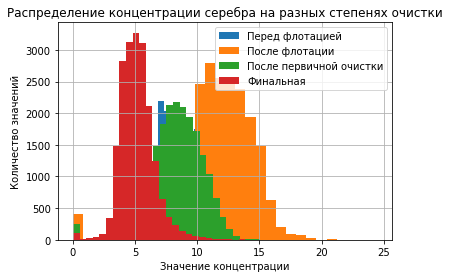

In [19]:
# Серебро
df_full['rougher.input.feed_ag'].hist(bins=30)
df_full['rougher.output.concentrate_ag'].hist(bins=30)
df_full['primary_cleaner.output.concentrate_ag'].hist(bins=30)
df_full['final.output.concentrate_ag'].hist(bins=30)


plt.legend(['Перед флотацией', 'После флотации', 'После первичной очистки', 'Финальная'])
plt.title('Распределение концентрации серебра на разных степенях очистки')
plt.xlabel('Значение концентрации')
plt.ylabel('Количество значений')
plt.show()

Выводы:

    1. Концентрация золота и свинца растет с клоичеством очисток. Концентрация серебра падает.
    2. Концентрация золота вырастает почти в два раза, в то время как свинец растет всего примерно на  40%.
    3. Разницу в степени роста концентраций и понижении концентрации серебра скорее всего можно объяснить технологическим процессом. Золото добывается по своим правилам с использованием химических свойств именно этошо вещества. В то время как для наиболее эффективной добычи свица и серебра скорее всего нужны другие технологические процессы. которые основаны на свойствах именно этих металлов.

Рассмотрим распределения размера гранул на разных этапах на обучающей и тестовой выборке:

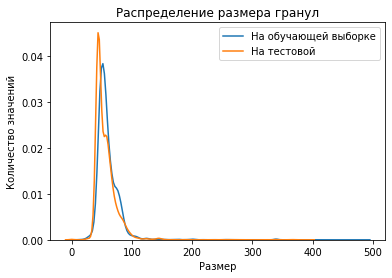

In [20]:
# поступление на флотацию:
import seaborn as sns

sns.kdeplot(df_train['rougher.input.feed_size'])
sns.kdeplot(df_test['rougher.input.feed_size'])

plt.legend(['На обучающей выборке','На тестовой'])
plt.title('Распределение размера гранул')
plt.xlabel('Размер')
plt.ylabel('Количество значений')
plt.show()

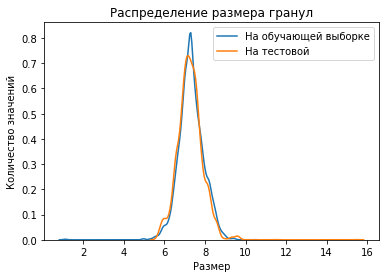

In [21]:
# поступление на первичную очистку:
sns.kdeplot(df_train['primary_cleaner.input.feed_size'])
sns.kdeplot(df_test['primary_cleaner.input.feed_size'])

plt.legend(['На обучающей выборке','На тестовой'])
plt.title('Распределение размера гранул')
plt.xlabel('Размер')
plt.ylabel('Количество значений') 
plt.show()

Распределения в целом совпадают. Какой-то критической ошибки в данных мы не видим. Разность в значениях обусловлена самим технологическим процессом: сначала выбираются гранулы бОльшего размера, а на следующем этапе остаются гранулы меньшего размера.

### Рассмотрим суммарную концентрацию металлов

In [22]:
# Сумма концентраций для руды(до флотации)
rougher = df_full['rougher.input.feed_ag'] + df_full['rougher.input.feed_pb'] + df_full['rougher.input.feed_au']

# Сумма концентраций после флотации
rougher_output = df_full['rougher.output.concentrate_au'] + df_full['rougher.output.concentrate_pb']+ df_full['rougher.output.concentrate_ag']

# Cумма концентарций после первичной очистки
primary_cleaner = df_full['primary_cleaner.output.concentrate_au'] + df_full['primary_cleaner.output.concentrate_pb'] + df_full['primary_cleaner.output.concentrate_ag']

# Сумма концентраций после вторичной очистки 
final_output = df_full['final.output.concentrate_au'] + df_full['final.output.concentrate_ag'] + df_full['final.output.concentrate_pb']


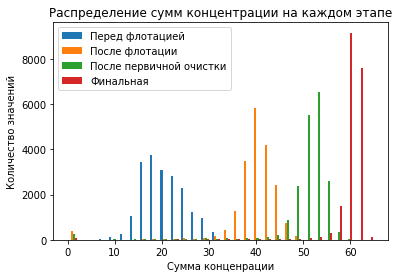

In [23]:
plt.hist([rougher, rougher_output, primary_cleaner, final_output], bins=30)

plt.legend(['Перед флотацией', 'После флотации', 'После первичной очистки', 'Финальная'])
plt.title('Распределение сумм концентрации на каждом этапе')
plt.xlabel('Сумма конценрации')
plt.ylabel('Количество значений')
plt.show()


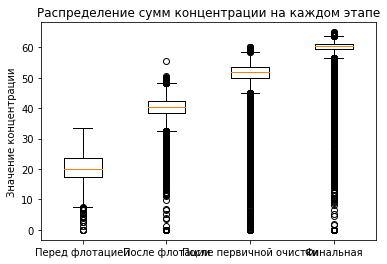

In [24]:
plt.boxplot([rougher, rougher_output, primary_cleaner, final_output])

plt.title('Распределение сумм концентрации на каждом этапе')
#plt.xlabel(names=('Перед флотацией', 'После флотации', 'После первичной очистки', 'Финальная'))
plt.xticks([1, 2, 3,  4], ['Перед флотацией', 'После флотации', 'После первичной очистки', 'Финальная'])
plt.ylabel('Значение концентрации')
plt.show()

In [25]:
# Уберем выпадающие значения
df_full = df_full[(df_full['rougher.output.concentrate_au'] > 0) &
                  (df_full['rougher.output.concentrate_ag'] > 0) & 
                  (df_full['rougher.output.concentrate_pb'] > 0) & 
                  (df_full['primary_cleaner.output.concentrate_au'] > 0) & 
                  (df_full['primary_cleaner.output.concentrate_ag'] > 0) &
                  (df_full['primary_cleaner.output.concentrate_pb'] > 0) & 
                  (df_full['final.output.concentrate_au'] > 0) &
                  (df_full['final.output.concentrate_ag'] > 0) &
                  (df_full['final.output.concentrate_pb'] > 0)]

In [26]:
# Сумма концентраций для руды(до флотации)
rougher = df_full['rougher.input.feed_ag'] + df_full['rougher.input.feed_pb'] + df_full['rougher.input.feed_au']

# Сумма концентраций после флотации
rougher_output = df_full['rougher.output.concentrate_au'] + df_full['rougher.output.concentrate_pb']+ df_full['rougher.output.concentrate_ag']

# Cумма концентарций после первичной очистки
primary_cleaner = df_full['primary_cleaner.output.concentrate_au'] + df_full['primary_cleaner.output.concentrate_pb'] + df_full['primary_cleaner.output.concentrate_ag']

# Сумма концентраций после вторичной очистки 
final_output = df_full['final.output.concentrate_au'] + df_full['final.output.concentrate_ag'] + df_full['final.output.concentrate_pb']


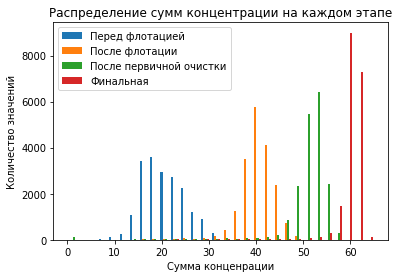

In [27]:
plt.hist([rougher, rougher_output, primary_cleaner, final_output], bins=30)

plt.legend(['Перед флотацией', 'После флотации', 'После первичной очистки', 'Финальная'])
plt.title('Распределение сумм концентрации на каждом этапе')
plt.xlabel('Сумма конценрации')
plt.ylabel('Количество значений')
plt.show()

### Выводы по анализу суммарных концентраций:

1. Мы видим группу значений, где сумма концентраций равно нулю. Это странно. Скорее всего в данных есть неточности. 
2. Мы видим, что откронений от средних квантилей больше с нижней стороны, чем с верхней.
3. Перезаписали таблицу с условиями и избавились от нулей.

In [28]:
# Уберем выпадающие значения в таблице с тренировочными данными
df_train = df_train[(df_train['rougher.output.concentrate_au'] > 0) &
                  (df_train['rougher.output.concentrate_ag'] > 0) & 
                  (df_train['rougher.output.concentrate_pb'] > 0) & 
                  (df_train['primary_cleaner.output.concentrate_au'] > 0) & 
                  (df_train['primary_cleaner.output.concentrate_ag'] > 0) &
                  (df_train['primary_cleaner.output.concentrate_pb'] > 0) & 
                  (df_train['final.output.concentrate_au'] > 0) &
                  (df_train['final.output.concentrate_ag'] > 0) &
                  (df_train['final.output.concentrate_pb'] > 0)]

В тестовой выборке этих данных нет.

### Выводы по части анализа данных:
1. мы проверили характер распределений для тренировочной и тестовой выборки - теперь приступать к моделированию.
2. Мы расмотрели распределения некоторых величин и убрали выпадающие значения. 

## Модель

Напишем функцию для рассчета SMAPE

In [29]:
def smape( a , f ):
    smape = 1/ len (a) * np.sum (2 * np.abs (f-a) / (np.abs (a) + np.abs (f))*100)
    return smape

Подготовим признаки для обучения

In [30]:
features = df_train[df_test.columns].drop('date', axis=1) # Оставляем в обучающей таблице только столбцы из тестового датасета
target_1 = df_train['rougher.output.recovery']
target_2 = df_train['final.output.recovery']

Заранее подготовим параметр scorer для оценки с помощью кросс-валидации

In [31]:
points = make_scorer(smape, greater_is_better=False)

#### Проверим модели линейной регресси на кросс-валидации для каждого целевого признака:

In [32]:
model_1 = LinearRegression()
model_2 = LinearRegression()

smape_1 = cross_val_score(model_1, features, target_1, cv=3, scoring=points, n_jobs=-1).mean()
smape_2 = cross_val_score(model_2, features, target_2, cv=3, scoring=points, n_jobs=-1).mean()

print('Средняя оценка модели для черновой концентрации', -(smape_1))
print('Средняя оценка модели для финальной концентрации', -(smape_2))

common_smape_lr = 0.25*smape_1 + 0.75*smape_2
print()

print('Общее симметричное среднее абсолютное процентное отклонение для модели лениейной регрессии составляет', -(common_smape_lr), '%')

Средняя оценка модели для черновой концентрации 10.376876577805136
Средняя оценка модели для финальной концентрации 13.41888371897968

Общее симметричное среднее абсолютное процентное отклонение для модели лениейной регрессии составляет 12.658381933686044 %


#### Проверим модели случайного леса на кросс-валидации для каждого целевого признака:

In [33]:
model_3 = RandomForestRegressor(random_state=1)

params = {'max_depth' : [2,4,6,8],
          'n_estimators' : range(10,50,5)}

grid_CV_3 = GridSearchCV(estimator=model_3, 
                         param_grid=params, 
                         scoring = points,
                         cv=3,
                         n_jobs=-1,
                         verbose=10)

grid_CV_3.fit(features, target_1)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV 1/3; 1/32] START max_depth=2, n_estimators=10...............................
[CV 1/3; 1/32] END .............max_depth=2, n_estimators=10; total time=   0.7s
[CV 2/3; 1/32] START max_depth=2, n_estimators=10...............................
[CV 2/3; 1/32] END .............max_depth=2, n_estimators=10; total time=   0.6s
[CV 3/3; 1/32] START max_depth=2, n_estimators=10...............................
[CV 3/3; 1/32] END .............max_depth=2, n_estimators=10; total time=   0.6s
[CV 1/3; 2/32] START max_depth=2, n_estimators=15...............................
[CV 1/3; 2/32] END .............max_depth=2, n_estimators=15; total time=   0.9s
[CV 2/3; 2/32] START max_depth=2, n_estimators=15...............................
[CV 2/3; 2/32] END .............max_depth=2, n_estimators=15; total time=   0.8s
[CV 3/3; 2/32] START max_depth=2, n_estimators=15...............................
[CV 3/3; 2/32] END .............max_depth=2, n_e

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8],
                         'n_estimators': range(10, 50, 5)},
             scoring=make_scorer(smape, greater_is_better=False), verbose=10)

In [34]:
best_params = grid_CV_3.best_params_
print(best_params)
print()
best_score = grid_CV_3.best_score_
print('Оценка лучшей модели случайного леса для чернового концентрата', -(best_score))

{'max_depth': 2, 'n_estimators': 10}

Оценка лучшей модели случайного леса для чернового концентрата 7.774590227971527


In [35]:
model_4 = RandomForestRegressor(random_state =1)

params = {'max_depth' : [2,4,6,8],
          'n_estimators' : range(10,50,5)}

grid_CV_4 = GridSearchCV(estimator=model_4, 
                         param_grid=params, 
                         scoring = points,
                         cv=3,
                         n_jobs=-1,
                         verbose=10)

grid_CV_4.fit(features, target_2)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV 1/3; 1/32] START max_depth=2, n_estimators=10...............................
[CV 1/3; 1/32] END .............max_depth=2, n_estimators=10; total time=   0.6s
[CV 2/3; 1/32] START max_depth=2, n_estimators=10...............................
[CV 2/3; 1/32] END .............max_depth=2, n_estimators=10; total time=   0.6s
[CV 3/3; 1/32] START max_depth=2, n_estimators=10...............................
[CV 3/3; 1/32] END .............max_depth=2, n_estimators=10; total time=   0.6s
[CV 1/3; 2/32] START max_depth=2, n_estimators=15...............................
[CV 1/3; 2/32] END .............max_depth=2, n_estimators=15; total time=   0.9s
[CV 2/3; 2/32] START max_depth=2, n_estimators=15...............................
[CV 2/3; 2/32] END .............max_depth=2, n_estimators=15; total time=   1.0s
[CV 3/3; 2/32] START max_depth=2, n_estimators=15...............................
[CV 3/3; 2/32] END .............max_depth=2, n_e

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8],
                         'n_estimators': range(10, 50, 5)},
             scoring=make_scorer(smape, greater_is_better=False), verbose=10)

In [36]:
best_params_4 = grid_CV_4.best_params_
print(best_params)
print()
best_score_4 = grid_CV_4.best_score_
print('Оценка лучшей модели случайного леса для финального концентрата', -(best_score_4))

{'max_depth': 2, 'n_estimators': 10}

Оценка лучшей модели случайного леса для финального концентрата 10.213809788407744


#### Посчитаем общее симметричное среднее абсолютное процентное отклонение для модели случайного леса

In [37]:
common_smape_rf = 0.25*best_score + 0.75*best_score_4

print('Общее симметричное среднее абсолютное процентное отклонение для модели лениейной регрессии составляет', -(common_smape_rf), '%')

Общее симметричное среднее абсолютное процентное отклонение для модели лениейной регрессии составляет 9.60400489829869 %


#### промежуточный вывод:

Для оценки симметричного среднего абсолютного процентного отклонения берем модель случайного леса с 10 деревьями с глубиной 2.

### Проверим модель на тестовой выборке

In [38]:
data_test=df_test.merge(df_full[['date', 'rougher.output.recovery', 'final.output.recovery']], on='date')
data_test

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,87.360133,67.776393
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,83.236367,61.467078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5117,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909,95.172585,68.919891
5118,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761,94.575036,68.440582
5119,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882,93.018138,67.092759
5120,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284,92.599042,68.061186


In [39]:
# Раздеим тестовую выборку на признаки и целевой показатель:
features_test = data_test.drop(['rougher.output.recovery','final.output.recovery', 'date'], axis=1)

target_test_1 = data_test['rougher.output.recovery']
target_test_2 = data_test['final.output.recovery']

In [40]:
# Обучим нашу модель случайного леса на обучающей тестовой выборке:

predictions_1 = grid_CV_3.best_estimator_.predict(features_test)
predictions_2 = grid_CV_4.best_estimator_.predict(features_test)

smape_final_1 = smape(target_test_1, predictions_1)
smape_final_2 = smape(target_test_2, predictions_2)

common_smape_final = 0.25*smape_final_1 + 0.75*smape_final_2

print('Общее симметричное среднее абсолютное процентное отклонение для модели лениейной регрессии составляет', (common_smape_final), '%')


Общее симметричное среднее абсолютное процентное отклонение для модели лениейной регрессии составляет 6.973553044053742 %


Сравним работу нашей модели со средним числом (проверим на адекватность)


In [41]:
dummy_regr_1 = DummyRegressor(strategy="mean")
dummy_regr_2 = DummyRegressor(strategy="mean")

dummy_regr_1.fit(features, target_1)
dummy_regr_2.fit(features, target_2)

dummy_pred_1 = dummy_regr_1.predict(features_test)
dummy_pred_2 = dummy_regr_2.predict(features_test)


score_1 = smape(target_test_1, dummy_pred_1)
score_2 = smape(target_test_2, dummy_pred_2)

common_smape_dm = 0.25*score_1 + 0.75*score_2

print('Общее симметричное среднее абсолютное процентное отклонение для константной модели', (common_smape_dm), '%')

Общее симметричное среднее абсолютное процентное отклонение для константной модели 7.770717123671202 %


#### Выыод по сравнению с дамми моделью:

Наша модель предсказывает лучше, чем случайная

## Выводы:


1. Вэтом проекте мы подгрузили данные в проект, заполнили пропуски и разобрались с тем, как сформированы обучающий и тестовый сеты. Проверили правильность расчеты целевой метрики и убедились в "исправности" данных.
2. По итогам анализа мы убедились в схожести распределений для тренировочной и тестовой выборки, расмотрели распределения некоторых величин и убрали выпадающие значения.
3. В рамках технического задания метрикой качества было выбрано именно процентное отклонение. 
4. Для предсказания мы использовали 3 модели: линейную регрессию, решающие деревья и случайный лес. 
5. Для повышения качества моделей мы применяли форматирование признаков, обучение на кросс валидации, перебор параметров модели.
6. В итоге нам удалось добиться точности выше, чем была указана заказчиком. 